<a href="https://colab.research.google.com/github/Dante1902/Tort-Al/blob/main/%D0%9D%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Форма данных (shape):
(21613, 21)

Первые несколько строк данных (head):
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1

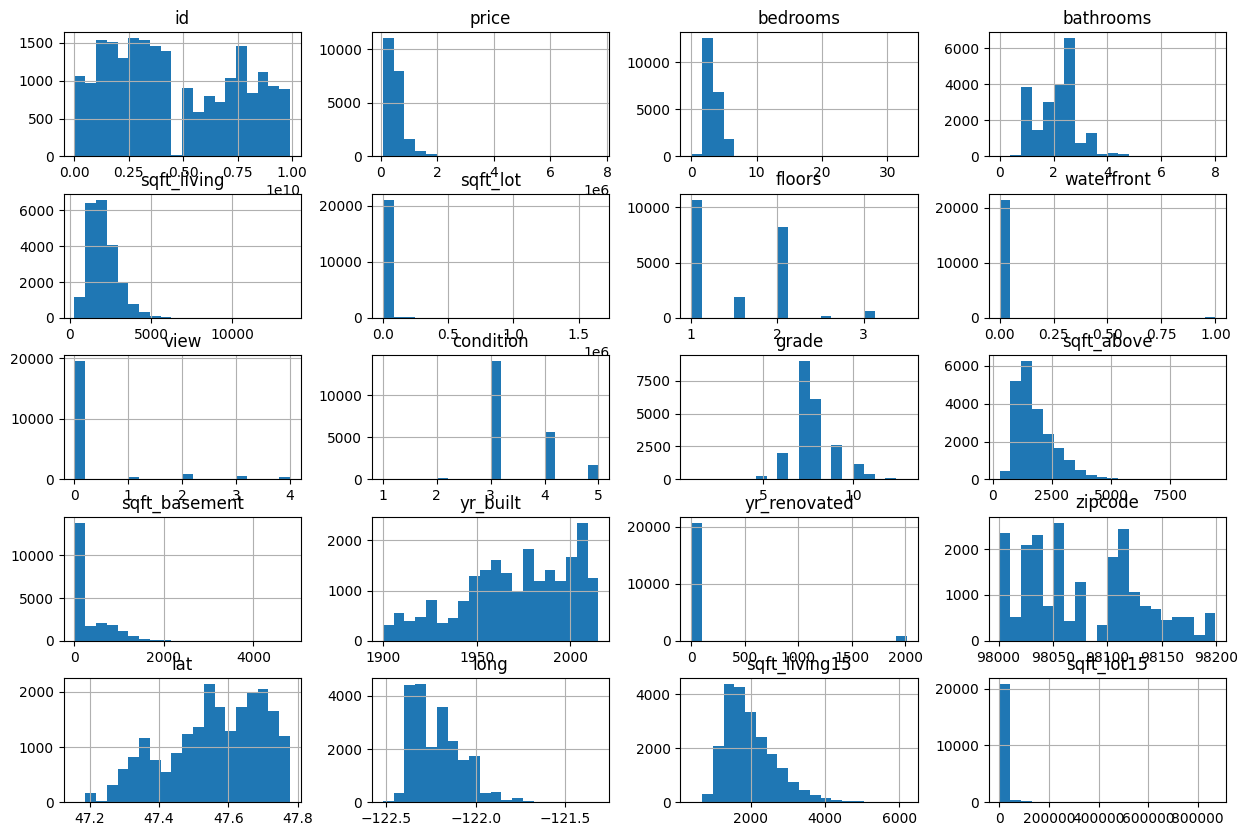

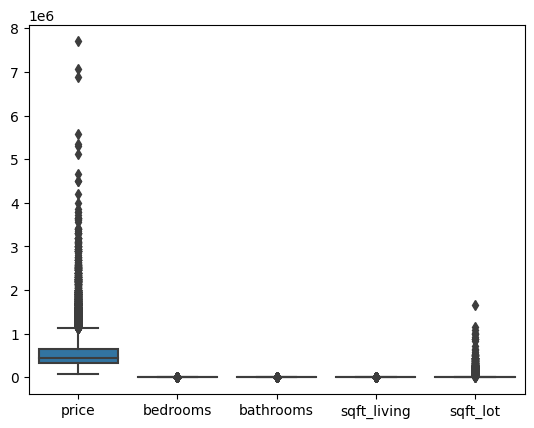

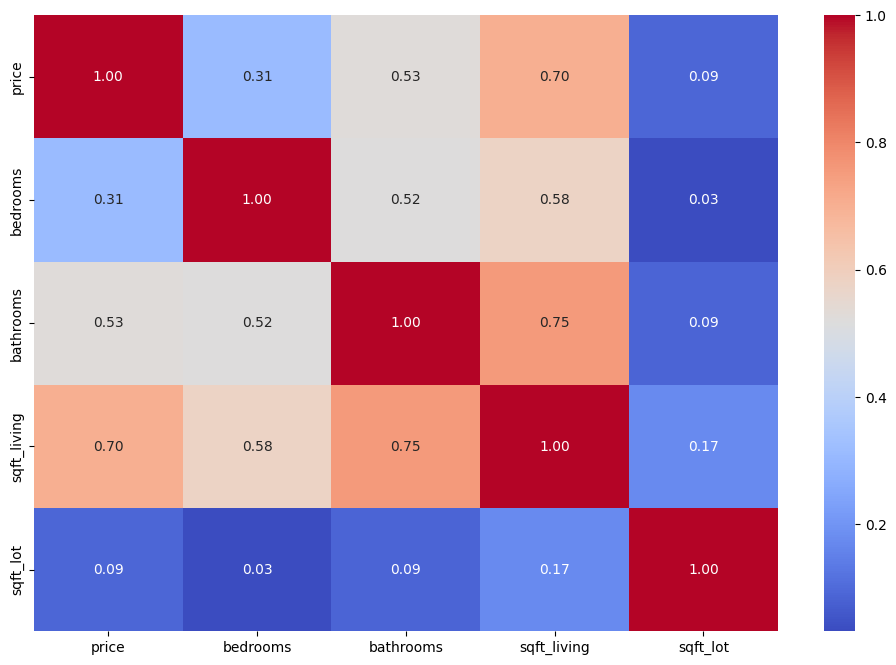


Linear Regression:
R^2 (train): 1.0
R^2 (test): 1.0
Mean Absolute Error (train): 2.0623825998958513e-10
Mean Absolute Error (test): 2.1082941350522152e-10
Mean Squared Error (train): 7.62749004872913e-20
Mean Squared Error (test): 8.110355165188019e-20
Cross-Validation R^2: 1.0

Lasso Regression:
R^2 (train): 0.9999999999921041
R^2 (test): 0.999999999992097
Mean Absolute Error (train): 0.6510140972702328
Mean Absolute Error (test): 0.6743895597839524
Mean Squared Error (train): 1.0315925927368548
Mean Squared Error (test): 1.1947434321258925
Cross-Validation R^2: 0.9999999999925496

Ridge Regression:
R^2 (train): 0.999999992767469
R^2 (test): 0.9999999928021902
Mean Absolute Error (train): 20.46145748781258
Mean Absolute Error (test): 21.187407400802318
Mean Squared Error (train): 944.9201560171822
Mean Squared Error (test): 1088.1412125925706
Cross-Validation R^2: 0.9999999931482563

Polynomial Regression:
R^2 (train): 1.0
R^2 (test): 1.0
Mean Absolute Error (train): 8.25316627429633

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


# Чтение данных из CSV файла
df = pd.read_csv('kc_house_data.csv')

# Получение представления о наборе данных
print("Форма данных (shape):")
print(df.shape)

print("\nПервые несколько строк данных (head):")
print(df.head())

print("\nОбщая информация о данных (info):")
print(df.info())

print("\nОписательная статистика данных (describe):")
print(df.describe())

# Подсчет количества пустых значений с использованием библиотеки numpy
print("\nКоличество пустых значений в признаках:")
print(np.sum(df.isnull()))




# Гистограммы
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Ящик с усами (диаграмма размаха) для выборочных признаков
selected_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
sns.boxplot(data=df[selected_features])
plt.show()


# Тепловая карта корреляционной матрицы
correlation_matrix = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()








# Обработка нечисловых значений в столбце 'yr_renovated'
df['yr_renovated'] = pd.to_numeric(df['yr_renovated'], errors='coerce')

# Объединение значений по периодам в признаках даты
df['yr_built'] = pd.to_datetime(df['yr_built'], format='%Y')
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], errors='coerce', format='%Y')

# Создание нового признака "Год постройки или последнего ремонта"
df['built_or_renovated'] = df[['yr_built', 'yr_renovated']].max(axis=1)


# Нормализация данных
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]))

# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(normalized_df, df['price'], test_size=0.2, random_state=42)

# Обучение моделей
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Оценка точности модели на обучающей и тестовой выборках
    print(f"\n{name}:")
    print(f"R^2 (train): {r2_score(y_train, y_pred_train)}")
    print(f"R^2 (test): {r2_score(y_test, y_pred_test)}")
    print(f"Mean Absolute Error (train): {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Mean Absolute Error (test): {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Mean Squared Error (train): {mean_squared_error(y_train, y_pred_train)}")
    print(f"Mean Squared Error (test): {mean_squared_error(y_test, y_pred_test)}")

    # Кросс-валидация
    cv_scores = cross_val_score(model, normalized_df, df['price'], cv=5, scoring='r2')
    print(f"Cross-Validation R^2: {np.mean(cv_scores)}")

# Поиск оптимальных гиперпараметров с помощью GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, scoring='r2', cv=5)
grid_search.fit(normalized_df, df['price'])

print("\nBest Parameters for Lasso Regression:")
print(grid_search.best_params_)